# Select 800 images from the dataset

In [44]:
import os
import numpy as np
import random
import shutil

In [46]:
#dataset path
dataset_path = "archive/Training/"

#tumor categories
tumor_classes = ["glioma", "meningioma", "pituitary", "notumor"]

#count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in tumor_classes}
print("Class distribution:", class_counts)

Class distribution: {'glioma': 1322, 'meningioma': 1339, 'pituitary': 1457, 'notumor': 1595}


In [48]:
#sample size per class
num_samples = 200 # 200 images per class

#new dataset path for subset
subset_path = "sub_dataset"
os.makedirs(subset_path, exist_ok=True)

# Create subset folders
for cls in tumor_classes:
    os.makedirs(os.path.join(subset_path, cls), exist_ok=True)

# Select and copy images
for cls in tumor_classes:
    class_path = os.path.join(dataset_path, cls)
    selected_images = random.sample(os.listdir(class_path), num_samples)
    
    for img in selected_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(subset_path, cls, img)
        shutil.copy(src, dst)

print("Subset of 800 images created successfully!")

Subset of 800 images created successfully!


In [50]:
sub_class_counts = {cls: len(os.listdir(os.path.join(subset_path, cls))) for cls in tumor_classes}
print("Class distribution:", sub_class_counts)

Class distribution: {'glioma': 200, 'meningioma': 200, 'pituitary': 200, 'notumor': 200}


# Test on 8 samples

In [53]:
import cv2
import matplotlib.pyplot as plt
import random

### get 8 samples

In [56]:
#selecting 8 random images from the 800 selected images
selection_path = "sub_dataset"
pair = []
random_images = []
for cls in tumor_classes:
    path = os.path.join(selection_path,cls)
    pair = random.sample(os.listdir(path), 2)
    
    for img in pair:
        random_images.append(os.path.join(path, img))
    
#random_images = np.array(random_images).flatten()
len(random_images),print(random_images)

['sub_dataset/glioma/Tr-gl_0544.jpg', 'sub_dataset/glioma/Tr-gl_0581.jpg', 'sub_dataset/meningioma/Tr-me_0449.jpg', 'sub_dataset/meningioma/Tr-me_0236.jpg', 'sub_dataset/pituitary/Tr-pi_0705.jpg', 'sub_dataset/pituitary/Tr-pi_1119.jpg', 'sub_dataset/notumor/Tr-no_1447.jpg', 'sub_dataset/notumor/Tr-no_0313.jpg']


(8, None)

### Display 8 samples

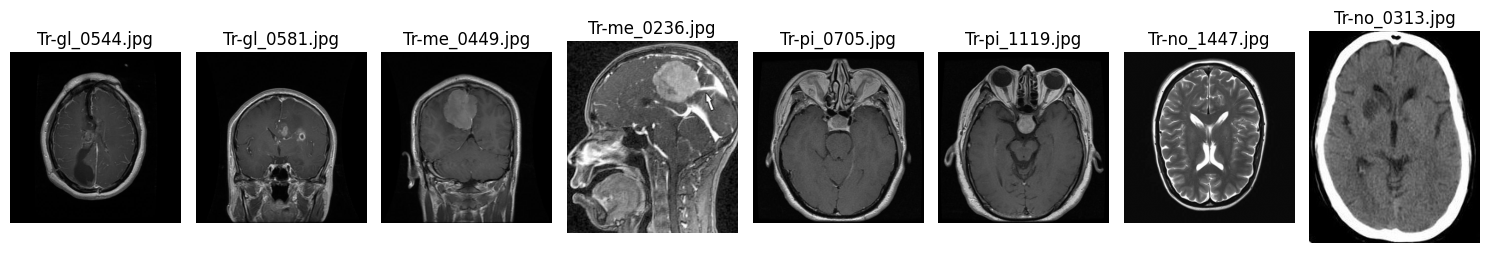

In [59]:
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i])  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    ax.imshow(img, cmap="gray")  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

### steps to crop image

In [ ]:
#resize images
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    img = cv2.resize(img, (128,128))
    ax.imshow(img, cmap="gray")  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

In [ ]:
#threshold images
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    img = cv2.resize(img, (128,128))
    ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY) # ******
    ax.imshow(thresh, cmap="gray")  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

In [ ]:
#contouring
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    img = cv2.resize(img, (128,128))
    ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cont_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) #change colour to bgr
    cont_img = cv2.drawContours(img,contours,-1, (255, 255, 255), 2) # ******
    
    ax.imshow(cont_img)  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

In [ ]:
#bounding box
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    img = cv2.resize(img, (128,128))
    ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #cont_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    #cont_img = cv2.drawContours(img,contours,-1, (255, 255, 255), 2) 

    if len(contours) != 0:
        c = max(contours, key=cv2.contourArea)# ******
    x, y, w, h = cv2.boundingRect(c)
    #box_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for visualization
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    ax.imshow(img)  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

In [ ]:
#crop image
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    img = cv2.resize(img, (128,128))
    ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #cont_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    #cont_img = cv2.drawContours(img,contours,-1, (255, 255, 255), 2) 

    if len(contours) != 0:
        c = max(contours, key=cv2.contourArea)# ******
    x, y, w, h = cv2.boundingRect(c)
    #box_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for visualization
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)

    cropped_image = img[y:y+h, x:x+w]
    cropped_image = cv2.resize(cropped_image, (128,128))
    
    ax.imshow(cropped_image,cmap="gray")  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

### doing all together

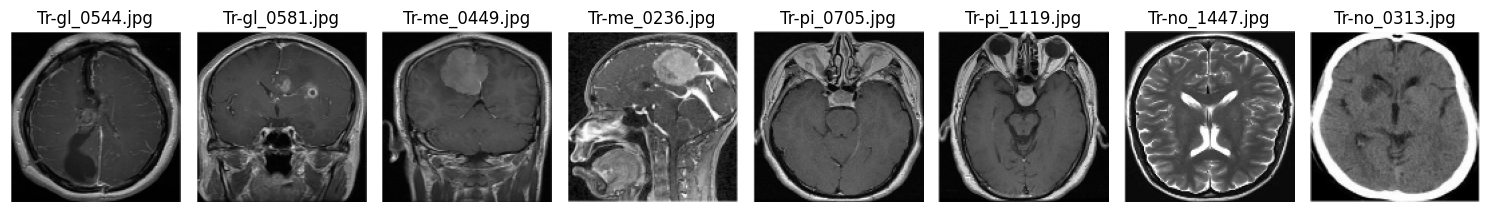

In [61]:
#all together
fig, axes = plt.subplots(1,8, figsize=(15, 6))

# Loop through each image and display it
for i, ax in enumerate(axes.flat):
    img = cv2.imread(random_images[i],cv2.IMREAD_COLOR)  # Read image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY
    ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY) # thresh stores the black and white image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #stores list of detected contours in binary image
    
    if len(contours) != 0:
        c = max(contours, key=cv2.contourArea)# c stores the largest contour
    x, y, w, h = cv2.boundingRect(c) #x,y stores the top left corner ans w is width, h is height
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2) # draws rectangle

    cropped_image = img[y:y+h, x:x+w] #crops as per size
    cropped_image = cv2.resize(cropped_image, (128,128)) #finally resizes the image
    
    ax.imshow(cropped_image,cmap="gray")  # Show image in gray correctly in matplotlib
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(random_images[i]))  # Optional title

plt.tight_layout()
plt.show()

# First preprocessing the images in the 800 image dataset
#### for faster computation and ease

In [64]:
import cv2

In [66]:
processed_dataset_path = "Processed_Images/"
os.makedirs(processed_dataset_path, exist_ok=True)

for cls in tumor_classes:
    os.makedirs(os.path.join(processed_dataset_path, cls), exist_ok=True)

In [68]:
for cls in tumor_classes:
    path = os.path.join(subset_path,cls)
    save_path = os.path.join(processed_dataset_path, cls)
    
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load normally (BGR)
        if img is None:
            print(f"Warning: Could not load image {img_path}")
            continue
        #get binary masked image
        ret, thresh = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY) # thresh stores the black and white image

        #get contour
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #stores list of detected contours in binary image

        #draw rectangle
        if len(contours) != 0:
            c = max(contours, key=cv2.contourArea)# c stores the largest contour
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)

        #crop image
        cropped_image = img[y:y+h, x:x+w]

         #finally resizes the image
        cropped_image = cv2.resize(cropped_image, (224,224))
        
        #normalizing
        #normalized_image = cv2.normalize(cropped_image, None, 0, 1, cv2.NORM_MINMAX)

        cv2.imwrite(os.path.join(save_path, img_name), cropped_image)

print("All image successfully grascaled and resized and cropped and normalized")

All image successfully grascaled and resized and cropped and normalized


### Checking for correctness

Cropped =  (224, 224)
Original =  (512, 512, 3)


(<Axes: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'),
 <matplotlib.colorbar.Colorbar at 0x734e3f52ce60>)

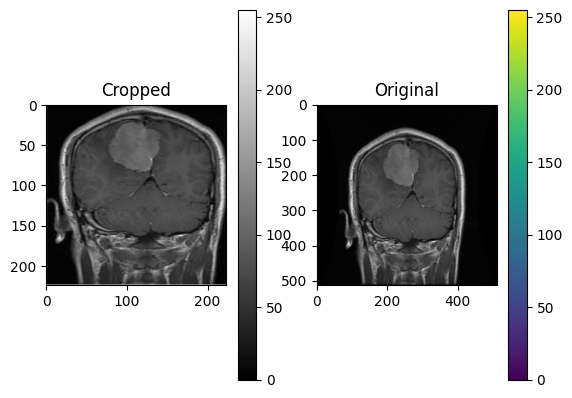

In [73]:
img1 = cv2.imread("Processed_Images/meningioma/Tr-me_0449.jpg",cv2.IMREAD_UNCHANGED)
print("Cropped = ",img1.shape)
plt.subplot(1,2,1),plt.imshow(img1,cmap="gray"),plt.title("Cropped"),plt.colorbar()
img2 = cv2.imread("archive/Training/meningioma/Tr-me_0449.jpg",cv2.IMREAD_UNCHANGED)
print("Original = ",img2.shape)
plt.subplot(1,2,2),plt.imshow(img2),plt.title("Original"),plt.colorbar()

### Rechecking

In [78]:
import imageio.v2 as imageio  # Import imageio with v2 for compatibility

# Load the image
image2 = imageio.imread('Processed_Images/meningioma/Tr-me_0449.jpg')

# Print the shape
print(image2.shape)  # Should be (128, 128) if correctly processed

(224, 224)


# Normalizing image
## Apply before feeding images to the model 

In [80]:
normalized_image = img1 / 255.0 #better for this project
#normalized_image = cv2.normalize(img1, None, 0, 1, cv2.NORM_MINMAX) #there is greater contrast
print("Min pixel value:", normalized_image.min())
print("Max pixel value:", normalized_image.max())

Min pixel value: 0.0
Max pixel value: 1.0


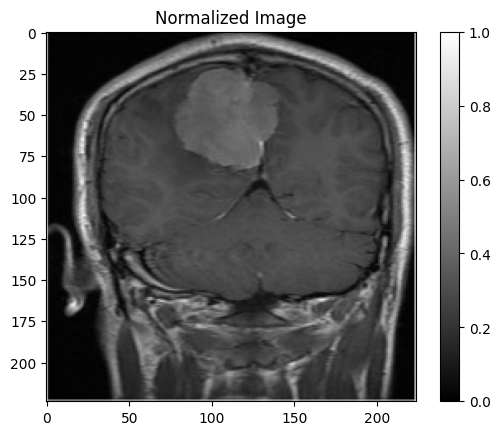

In [82]:
plt.imshow(normalized_image, cmap="gray")
plt.colorbar()  # Show intensity scale
plt.title("Normalized Image")
plt.show()

In [ ]:
#not required if using deep learing as this will result in loss of info
from skimage.feature import hog
cv_normalized_image = cv2.normalize(img1, None, 0, 1, cv2.NORM_MINMAX)
hog_features, hog_image = hog(cv_normalized_image, pixels_per_cell=(2,2),
                              cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image, cmap="gray")
plt.title("HoG Features")
plt.show()

In [86]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image

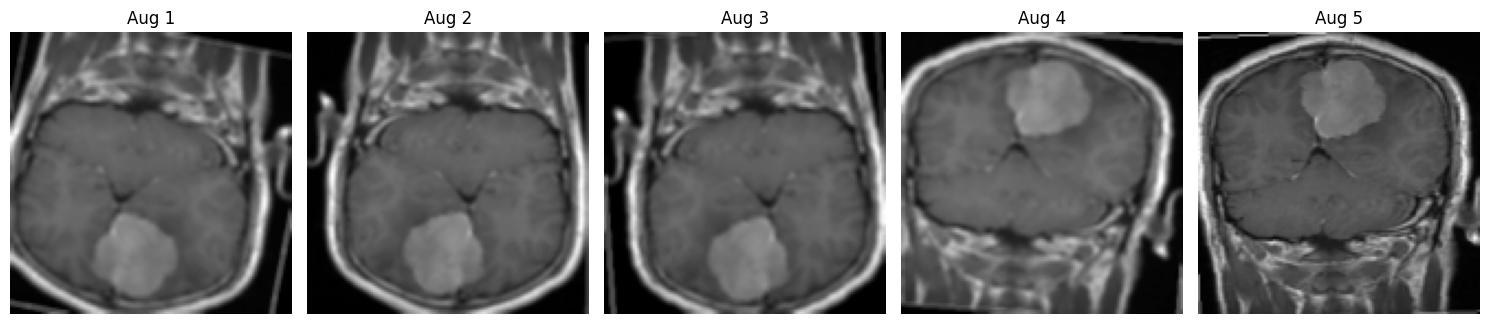

In [88]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Rotate up to 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),# 50% chance of horizontal flip
    transforms.RandomResizedCrop(size=(128, 128), scale=(0.9, 1.0)),  # Slight zoom
    transforms.ColorJitter(brightness=0.1, contrast=0.1),  # Adjust brightness/contrast
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),  # Add slight blur
    transforms.ToTensor()  # Convert image to tensor
])
img1_pil = Image.fromarray(img1)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    augmented_img = transform(img1_pil)  # Apply augmentation

    # Convert tensor to NumPy for visualization
    augmented_img_np = augmented_img.numpy().squeeze()  # Remove channel dim for grayscale

    # Display the augmented image
    axes[i].imshow(augmented_img_np, cmap="gray")
    axes[i].set_title(f"Aug {i+1}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


# Data augmentation in 800 images

In [91]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image

In [93]:
augmented_dataset_path = "Augmented_Images/"
os.makedirs(augmented_dataset_path, exist_ok=True)

for cls in tumor_classes:
    os.makedirs(os.path.join(augmented_dataset_path, cls), exist_ok=True)

In [95]:
for cls in tumor_classes:
    path = os.path.join(processed_dataset_path,cls)
    save_path = os.path.join(augmented_dataset_path, cls)

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = Image.open(img_path)

        for i in range(5):  # Create 5 augmented versions per image
            augmented_img = transform(img)
            save_image(augmented_img, f"{save_path}/aug_{i}_{img_name}")

print("Data Augmentation Complete! Augmented images saved in:", augmented_dataset_path)

Data Augmentation Complete! Augmented images saved in: Augmented_Images/


In [97]:
aug_class_counts = {cls: len(os.listdir(os.path.join(augmented_dataset_path, cls))) for cls in tumor_classes}
print("Class distribution:", aug_class_counts)

Class distribution: {'glioma': 1000, 'meningioma': 1000, 'pituitary': 1000, 'notumor': 1000}
